## Index Decomposition of the drivers behind the Sustainable Development Index of Costa Rica 1990 - 2022

#### Scope and Table of Contents

In [2]:
# Costa Rica is for many years now the best performing country in terms of the Sustainable Development Index (SDI). 
# See: https://www.sustainabledevelopmentindex.org/time-series.
# In this script we analyze some of the material conditions behind the high performing Sustainable Development Indicator (SDI) of Costa Rica.
# By introducing MFA-Indicators and organize the SDI Equation in a Kaya-Equation like manner, 
# we gain understanding of these conditions through the use of index decomposition analysis.
# 
# Table of Contents:
#   (0) Legend of indicators and proposed extension of the SDI equation 
#   (1) Summary
#   (2) Import libraries and data
#   (3) Define functions to process data 
#   (4) Calculate relevant indicators and drivers
#   (5) Figures
#       - Figure 1.a: SDI, DI, EII 
#       - Figure 1.b: SDI, DI, EII relative to 1990
#       - Figure 2.a: DMC and MF 
#       - Figure 2.b: DMC and MF relative to 1990 
#       - Figure 3.a: SDI, (MF/EII), (DMC/MF), (DI/DMC)
#       - Figure 3.b: SDI, (MF/EII), (DMC/MF), (DI/DMC) relative to 1990 
#   (6) Disussion and outlook

#### Legend of indicators and proposed extension of the SDI equation

In [3]:
# Original SDI Equation:
# Sustainable Development Indicator (SDI); Development Indicator (DI); Ecological Impact Indicator (EII)
# SDI = DI / EII (See Hickel, Jason. 2020)
#
# MFA Indicators to be studied:
# Material Footprint (MF), Domestic Material Consumption (DMC)
#
# The approach of this work is to consistently introduce the following Intensities and Efficiencies:
# Ecological Material Efficiency (MF/EII)
# Economic Internalization Rate (DMC/MF)
# Social Material Intensity (DI/DMC)
# We refer to these as Drivers in the following.
# These names are not taken from the literature but introduced here for convenience. 
# They are chosen to best reflect what they operationalize. However, the term "Economic Internalization Rate" might be misleading.
#  
# By introducing the Drivers into the equation, we find: SDI = DI/EII = (DI/DMC) * (DMC/MF) * (MF/EII)

#### Summary

In [4]:
# Summary of the Analysis
# The SDI grows steadily from 1990 to 2022 (Figure 1). Initially, it appears that the DI drives the overall improvement in SDI,
# as the EII remains constant over this period. 
# However, by introducing MFA indicators through a 'Kaya-like Equation,' the focus shifts from the DI towards the EII. 
# Examining the material conditions reveals that the rise in DI is closely tied to material inputs (and likely the expansion of infrastructure). 
# Ultimately, it seems that the rise in SDI is due to improving Ecological Material Efficiency (lower environmental impact per kg).
#
# To understand how these findings relate to Costa Rica's position in the global system, refer to the broader discussion and outlook at the end of the script

#### Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from matplotlib.ticker import MultipleLocator

In [2]:
# This is the 2024 'Sustainable Development Index' data time series 1990 to 2022 for 163 countries
# Source: https://www.sustainabledevelopmentindex.org/time-series
# Author and original work: Hickel, Jason. 2020. “The Sustainable Development Index: Measuring the Ecological Efficiency of Human Development in the Anthropocene,”
# It includes spread sheets covering: SDI, Life Expectancy (years), Expected Years of Schooling,
# Mean Years of Schooling, GNI pcap. const 2017$ PPP, CO2 emissions pcap (tonnes), Mat. Footprint pcap (tonnes)
dataSDI = pd.ExcelFile('SDI+and+Components+(1990-2022).xlsx')

# Creating seperat dataframes for each socio-ecological indicator

dfSDI = pd.read_excel(dataSDI, 'SDI')
dfSDIT = dfSDI.T

dfLE = pd.read_excel(dataSDI, 'Life Expectancy (years)')
dfLET = dfLE.T

dfES = pd.read_excel(dataSDI, 'Expected Years of Schooling')
dfEST = dfES.T

dfMS = pd.read_excel(dataSDI, 'Mean Years of Schooling')
dfMST = dfMS.T

dfGNI = pd.read_excel(dataSDI, 'GNI pcap. const 2017$ PPP')
dfGNIT = dfGNI.T

# The data for consumption-based CO2 emissions is derived from EORA-PRIMAP. 
dfCO2 = pd.read_excel(dataSDI, 'CO2 emissions pcap (tonnes)')
dfCO2T = dfCO2.T

#The data for material footprint is derived from the UN International Resource Panel Global Material Flows database.
dfMF = pd.read_excel(dataSDI, 'Mat. Footprint pcap (tonnes)')
dfMFT = dfMF.T

In [3]:
# This is the 2024 'Domenstic Material Consumption' data time series 1970 to 2024 for 163 countries (Global Material Flows Database)
# Source: https://www.resourcepanel.org/global-material-flows-database
# Institutions involved developing: Csiro, WU Vieanna, BOKU Vianna, Nagoya University
# Whole Database constitutes of typical MEFA indicators (up to 13 Material-Flows in tonnes per year), MF Indicator (MRIO) and Economic Indicators GDP (const.). 
# Critical Intensities (DMC/GDP ect. ) can be found there.
# For this analysis we download DMC/cap
dfDMC = pd.read_csv("mfa_dmc_pc_CRI.csv")
dfDMCT = dfDMC.T

#### Define functions

In [4]:
# Here we set the functions to calculate the Development Index (DI) and Eceological Impact Index (SDI) (See Hickl, 2020, for discussion).

def LEI(x):
    '''Function for the Life Expectancy Index. Takes as variable: Life Expectancy (years)'''
    return (x - 20)/(85-20)

def EI(x,y):
     '''Function for the Education Index. Variable: Mean Years of Schooling and Expected Years of Schooling'''
     return (x + y)/2

def II(x):
    '''Function for the Income Index. Variable: GNI pcap. const 2017$ PPP'''
    return (np.log(x) - np.log(100))/(np.log(20000)-np.log(100))

def DI(a,x,y,z):
    '''Function for the Development Index. Takes: Life Expectancy (years); Mean Years of Schooling; Expected Years of Schooling; Variable: GNI pcap. const 2017$ PPP'''
    return (LEI(a)*EI(x,y)*II(z))**(1/3)


def EII(s,a,x,y,z):
    '''Ecological Impact Index. Is calculated indirectly (because CO2 Planetary Boundaries data is missing). Takes: SDI and DI(a,x,y,z) '''
    return DI(a,x,y,z)/s

#### Calculate relevant indicators and drivers

In [5]:
# Processing data through DI-function, returns the numpy array 'DevIndCRI'. 
# Note: Tthe II-function leads to NaN values, when using pd.dataframes as inputs. This perhaps traces back to the use of np.log(). 
# As a work around we iterate through the functions.
# Note for Future work: When going for a cross country analysis, this will be fixed.
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [DI(dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('Somthing went wrong with the loop range')
DevIndCRI = np.array(lst)

In [24]:
# Processing data through EII-function, returns the numpy array 'EcoImpIndCRI'. 
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [EII(dfSDIT.iat[x,37],dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('wrong len')
EcoImpIndCRI = np.array(lst)

In [7]:
# Returns the numpy array 'DMC'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]]
     else:
        print('wrong len')
DMC = np.array(lst)

In [8]:
# Returns the numpy arry for MF/cap 'MF'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfMFT.iat[x,37]]
     else:
        print('wrong len')
MF = np.array(lst)

In [9]:
# Calculating the Externalization Intensity DMC/MF and returning numpy array 'DMCoverMF'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]/dfMFT.iat[x,37]]
     else:
        print('wrong len')
DMCoverMF = np.array(lst)

In [28]:
# Calculating all drivers and put them into numpy arrays
MFoverEI = MF/EcoImpIndCRI # Ecological Material Efficiency (MF/EII)
DMCoverMF = DMCoverMF # Rate of economic internalization (DMC/MF)
DIoverDMC = np.array((DevIndCRI/dfDMCT.iloc[24:57].T).T) # Social Material Intensity (DI/DMC)

#### Figures

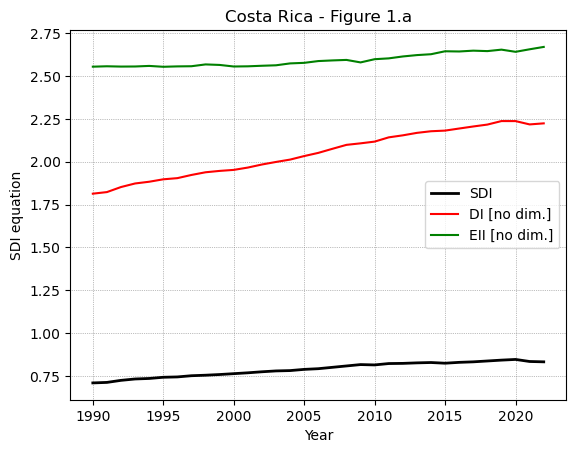

In [29]:
# Figure 1.a
# Plotting the SDI and Drivers for Costa Rica from 1990 to 2022

plt.plot(dfSDIT[37][2:], label='SDI', color='black', linewidth=2)
plt.plot(DevIndCRI, label='DI [no dim.]', color='red')
plt.plot(EcoImpIndCRI, label='EII [no dim.]', color='green')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('SDI equation')
plt.title('Costa Rica - Figure 1.a') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_19976\2965483305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI', color='black', linewidth=2)


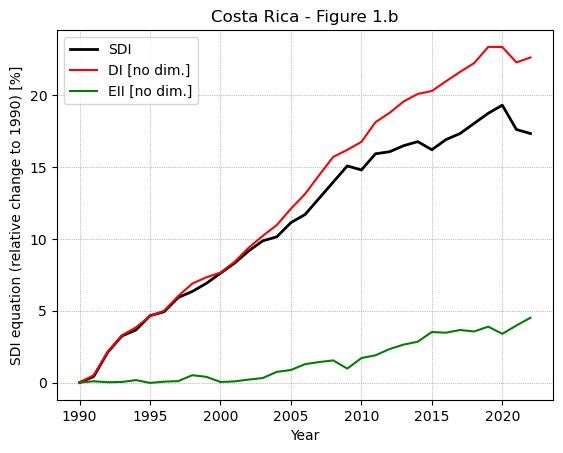

In [ ]:
# Figure 1.b
# Plotting the Relative SDI and Drivers for Costa Rica from 1990 to 2022

plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI', color='black', linewidth=2)
plt.plot(DevIndCRI/DevIndCRI[0]*100-100, label='DI [no dim.]', color='red')
plt.plot(EcoImpIndCRI/EcoImpIndCRI[0]*100-100, label='EII [no dim.]', color='green')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('SDI equation (relative change to 1990) [%]')
plt.title('Costa Rica - Figure 1.b') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

plt.show()

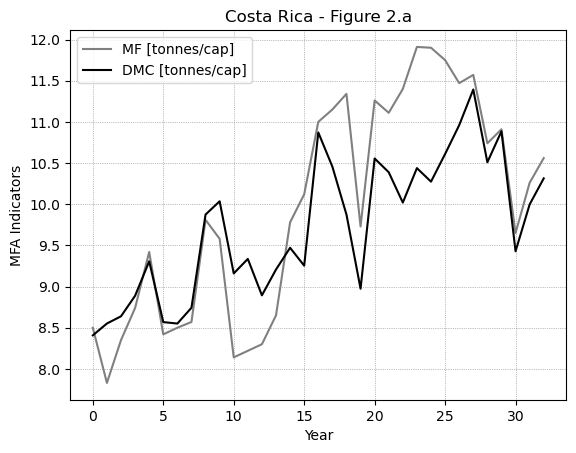

In [30]:
# Figure 2.a
# Plotting DMC, MF for Costa Rica from 1990 to 2022

plt.plot(MF, label='MF [tonnes/cap]', color='gray')
plt.plot(DMC, label='DMC [tonnes/cap]', color='black')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('MFA Indicators')
plt.title('Costa Rica - Figure 2.a') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

plt.show()

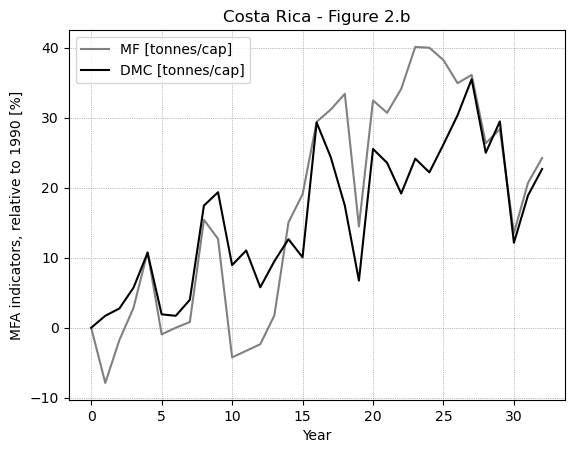

In [16]:
# Figure 2.b
# Plotting ralative changes for DMC, MF compared to 1990 values, for Costa Rica from 1990 to 2022

plt.plot(MF/MF[0]*100-100, label='MF [tonnes/cap]', color='gray')
plt.plot(DMC/DMC[0]*100-100, label='DMC [tonnes/cap]', color='black')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('MFA indicators, relative to 1990 [%]')
plt.title('Costa Rica - Figure 2.b') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

plt.show()

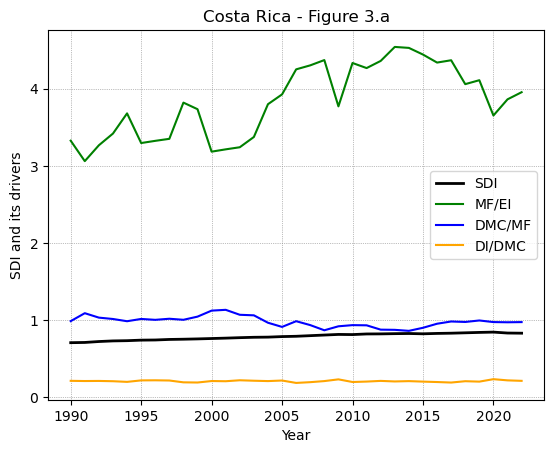

In [31]:
# Figure 3.a
# Plotting the SDI and Drivers for Costa Rica from 1990 to 2022

plt.plot(dfSDIT[37][2:], label='SDI', color='black', linewidth=2)
plt.plot(MFoverEI, label='MF/EI', color='green')
plt.plot(DMCoverMF, label='DMC/MF', color='blue')
plt.plot(DIoverDMC, label='DI/DMC', color='orange')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('SDI and its drivers')
plt.title('Costa Rica - Figure 3.a') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_9236\2242851603.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI/0.71', color='black', linewidth=2)


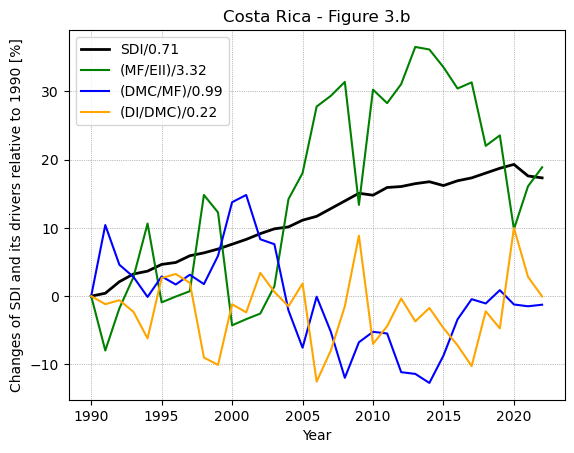

In [32]:
# Figure 3.b
# Plotting ralative changes for SDI and its Drivers for Costa Rica from 1990 to 2022. Compared to 1990.
# This is similar to Kaya-Identity depiction (see https://en.wikipedia.org/wiki/Kaya_identity) and a basic form of Index Decomposition
# SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII)

plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI/0.71', color='black', linewidth=2)
plt.plot(MFoverEI/MFoverEI[0]*100-100, label='(MF/EII)/3.32', color='green')
plt.plot(DMCoverMF/DMCoverMF[0]*100-100, label='(DMC/MF)/0.99', color='blue')
plt.plot(DIoverDMC/DIoverDMC[0]*100-100, label='(DI/DMC)/0.22', color='orange')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Changes of SDI and its drivers relative to 1990 [%]')
plt.title('Costa Rica - Figure 3.b') 
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

plt.show()

#### Discussion and outlook

In [19]:
# Legend:
# Our decomposition is done in a 'Kaya-Identity-Manner': 
# SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII)
# Using the Material Footprint (MF) and Domestic Material Consumption (DMC)

# Intensities and Efficiencies (Drivers):
# Ecological Material Efficiency (MF/EII)
# Economic Internalization Rate (DMC/MF)
# Social Material Intensity (DI/DMC)

# Discussion:
# Between 1990 and 2022, the Sustainable Development Index (SDI) 
# increases steadily by almost 20% (Figure 1.b).
# The Development Index (DI) grows by about 25%, while the 
# Environmental Impact Index (EII) remains constant until around 2000, 
# after which it rises by approximately 5%. 
# Most of the change in the SDI can therefore be attributed to the DI.
#
# By introducing MFA indicators through a Kaya-Identity-style 
# index decomposition, SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII),
# we can gain an understanding of the material realities behind the 
# improved DI and the relatively constant, slightly increasing EII.
#
# The increase in DI (related to education, income, and health standards) 
# is sustained by a steadily rising demand for domestic material 
# consumption (DMC, Fig. 2.a/b). 
# This is why the 'Social Material Intensity' (DI/DMC) remains nearly 
# constant over the period 1990-2022, with fluctuations of ±10% 
# (Figure 3.a/b).
# The steady increase in DI does not seem to result from more efficient 
# use of material inputs, but rather points to an expansion of 
# infrastructure and material throughput.
# The expanding DMC might be caused by political aims to increase access 
# to social services (housing, sanitation, education...) for broader 
# segments of the population over time, through the buildup of stocks 
# used to provide these services.
#   -> To gain a broader understanding of these material conditions, it 
#       is necessary to:
#       (1) Examine material flows in more detail and add an energy 
#           perspective (most GHG emissions relate to energy),
#       (2) Study stock formation, as they are directly linked to services 
#           (MATSTOCK, or at least stock-building flow in- and outputs 
#           analysis), and 
#       (3) Investigate which services are provided and to which parts of 
#           society.
#       (4) For a 'Cause-Analysis,' there needs to be an analysis of 
#           different social agents/actors (state, international relations, 
#           workers, corporations, etc.) and their actions on the metabolism.
#
# One might expect that Costa Rica (CRI) has a higher Material Footprint 
# than DMC, given it possesses little or no heavy industry and no 
# domestic supply of fossil energy carriers or substantial extractive 
# mining industries (referencing energy data from OLADE, Latin American 
# Energy Organization).
# To sustain its economy, Costa Rica relies on imports of these resources, 
# which contribute to its Material Footprint (MF).
# The Internalization Rate (DMC/MF) stays within a ±15% change rate from 
# no externalization 'pressure' (DMC/MF=1).
# This means its material use domestically (production-based) is of 
# similar magnitude to its material footprint (consumption-based).
# The Internalization Rate (DMC/MF) does not provide information about 
# the actual trade structure or openness of the economy. 
# However, when the value differs from 1, there is some degree of 
# material burden externalization (DMC/MF < 1) or internalization 
# (DMC/MF > 1).
# Of course, this argument depends on whether one adopts consumption, 
# production, or another accounting responsibility (See Marques et al., 
# 2012).
#
# To make sense of this, one should discuss CRI's position in the 
# world-system. 
# Costa Rica had an economically protective phase prior to 1980 
# (import substitution phase), followed by a crisis in the 1980s, which 
# led to the 'new economic' model starting in the mid-1980s. 
# See "Industrial Development Strategies in Costa Rica," Paus, Eva.
# Our analysis lies within the 'new economic' model, which is more open 
# to the world economy and led to the formation of new industries, 
# processing semi-finished products for export.
# Most notably is the rise of the microchip industry in the 1990s and 
# later the rise of medical products (prostheses).
# See, for instance, the COMTRADE Database for export products and their 
# monetary trade volume. 
# Costa Rica's low Internalization Rate (DMC/MF) might arise from its 
# position in the middle of the global value chain. 
# The MF it imports leaves the country again with the further processed 
# products. Besides these processing industries, the agricultural sector 
# also plays a substantial role in exporting goods. In fact, the 
# agricultural sector has played a central role over the last decades.
# However, the agricultural footprint can partly be traced back to 
# neighboring countries, especially for its exported meat (Folz, private 
# comm., 2023). 
# One might conclude that Costa Rica's MF remains closely tied to its DMC 
# because it processes semi-finished products and exports them further.
# In this way, the imported footprints leave the country again.
#   -> To further investigate this, one should examine the export and 
#       value chain structure further, possibly using
#       (1) EEMRIO-Analysis (EXIOBASE, GLORIA...),
#       (2) Trade data with its most important trade partners (USA, etc.) 
#           and calculate Material Flows in accordance with MFA methods.
#
# Finally, we find that the SDI appears to be mostly driven by the 
# Ecological Material Efficiency (MF/EII). 
# It dominates the other drivers in amplitude since 2003 (Figure 3.b). 
# Before that time, the other drivers also influence the SDI.
# The EII (which measures how much the planetary boundaries of MF and GHG 
# emissions are transgressed) grows by around 5%, with little fluctuation 
# (Figure 1.b).
# The MF grows steadily over time (up to +40%) (Figure 2.b) and dominates 
# the dynamics with its amplitude and large fluctuations. 
# Consequently, the Ecological Material Efficiency (MF/EII) grows closely 
# to MF.
# This means that in the period from 1990-2022, CRI's MF developed toward 
# an overall lower environmental impact per kg of material, with a +19% 
# improvement.
#
#   -> To further investigate:
#       (1) Delve into higher material details within MF,
#       (2) Introduce a framework to connect diverse material/energy flows 
#           to their environmental pressures
#           -> Downscaled Planetary Boundaries (Häyhä et al., 2016).
#
# Lastly, we note that we can roughly identify three phases: 
# (1) 1990-2000, (2) 2000-2014, and (3) 2014-2022, where driver patterns 
# change.
# It is worth noting that one might observe the 2008 financial crisis 
# (rapidly decreasing DMC and MF) and the COVID-19 pandemic 
# (2019 -> decreasing DI).
#   -> The next step would be to analyze these changes/phases over time in more 
#       detail 

# Outlook:
# In the future, one could systematically analyze Costa Rica's economy by 
# introducing greater parts of the process chain, material stocks 
# and more detailed flows within a Kaya-Equation framework.
# It is also possible to perform a cross-country analysis based on this 
# approach. 
# This could help identify relevant drivers behind a good or poor SDI.

